In [1]:
from influxdb_client import InfluxDBClient, Point
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# read from influxdb v2
url = "http://localhost:8086"
token = "rXvSrCooMThDj9jTMKBkiNn0H84_3c8hWoYcNXfvGklOqLtUQwLtb-FF8291I0ld873VuHo0oee4VNVN9cM7qA=="
org = "mema_org"
bucket = "mema_bucket"

# Initialize the InfluxDB client
client = InfluxDBClient(url=url, token=token, org=org)

In [8]:
# Manually set start and stop times
start_time = "2023-12-17T17:40:33Z"
stop_time = "2023-12-17T18:16:25Z"

# Build Flux query to filter measurements by range and add the drift_detector field
flux_query = 'from(bucket: "mema_bucket") |> range(start: 2023-12-17T17:40:33Z, stop: 2023-12-17T18:16:25Z) |> filter(fn: (r) => r._measurement == "hai_results") |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value") |> map(fn: (r) => ({"drift_detector": 1}))'

In [9]:
# Query InfluxDB
result = client.query_api().query_data_frame(query=flux_query)

# Display the result
print(len(result))

0


In [14]:
# influxql query measurement hai_results in mema_bucket
query = f'from(bucket:"{bucket}") |> range(start: -1h) |> filter(fn: (r) => r._measurement == "hai_results") |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")'
df = client.query_api().query_data_frame(query)

In [15]:
df

,result,table,_start,_stop,_time,_measurement,host,accuracy,attack,drift_detected,warning_detected
0,_result,0,2023-12-17 17:19:13.578537+00:00,2023-12-17 18:19:13.578537+00:00,2023-12-17 17:19:13.583513+00:00,hai_results,131cf4980b9c,1.0,0.0,0.0,0.0
1,_result,0,2023-12-17 17:19:13.578537+00:00,2023-12-17 18:19:13.578537+00:00,2023-12-17 17:19:13.584109+00:00,hai_results,131cf4980b9c,1.0,0.0,0.0,0.0
2,_result,0,2023-12-17 17:19:13.578537+00:00,2023-12-17 18:19:13.578537+00:00,2023-12-17 17:19:13.590723+00:00,hai_results,131cf4980b9c,1.0,0.0,0.0,0.0
3,_result,0,2023-12-17 17:19:13.578537+00:00,2023-12-17 18:19:13.578537+00:00,2023-12-17 17:19:13.602057+00:00,hai_results,131cf4980b9c,1.0,0.0,0.0,0.0
4,_result,0,2023-12-17 17:19:13.578537+00:00,2023-12-17 18:19:13.578537+00:00,2023-12-17 17:19:13.603935+00:00,hai_results,131cf4980b9c,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
378279,_result,0,2023-12-17 17:19:13.578537+00:00,2023-12-17 18:19:13.578537+00:00,2023-12-17 18:15:51.350508+00:00,hai_results,131cf4980b9c,1.0,0.0,0.0,0.0
378280,_result,0,2023-12-17 17:19:13.578537+00:00,2023-12-17 18:19:13.578537+00:00,2023-12-17 18:15:51.360557+00:00,hai_results,131cf4980b9c,1.0,0.0,0.0,0.0
378281,_result,0,2023-12-17 17:19:13.578537+00:00,2023-12-17 18:19:13.578537+00:00,2023-12-17 18:15:51.360566+00:00,hai_results,131cf4980b9c,1.0,0.0,0.0,0.0
378282,_result,0,2023-12-17 17:19:13.578537+00:00,2023-12-17 18:19:13.578537+00:00,2023-12-17 18:15:51.362123+00:00,hai_results,131cf4980b9c,1.0,0.0,0.0,0.0


In [16]:
# set font size 
plt.rcParams.update({'font.size': 14})

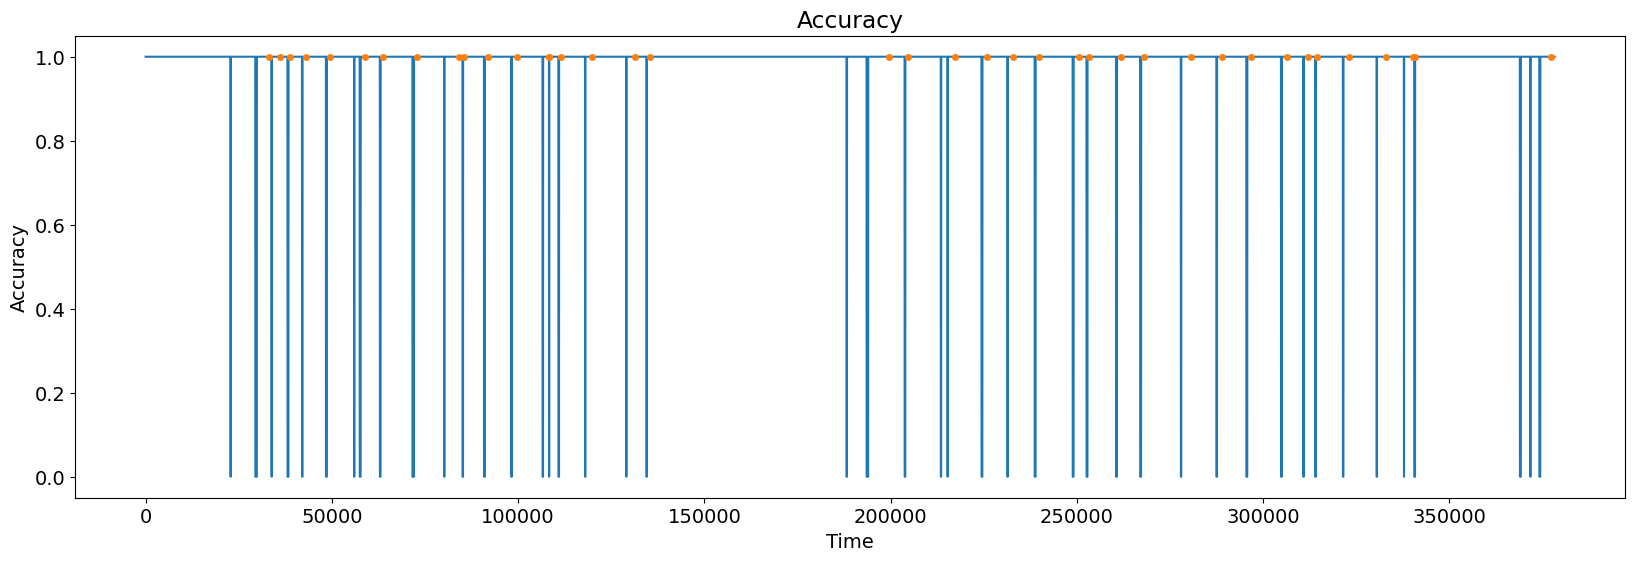

In [17]:
# set figure size
plt.figure(figsize=(20,6))
# plot attack
# plot accuracy
plt.plot(df['accuracy'])
# plot drift detections
plt.plot(df[df['drift_detected']>0]['drift_detected'], linewidth=0, marker='o', markersize=4)
# set title and labels
plt.title('Accuracy')
plt.xlabel('Time')
plt.ylabel('Accuracy')
# show plot
plt.show()


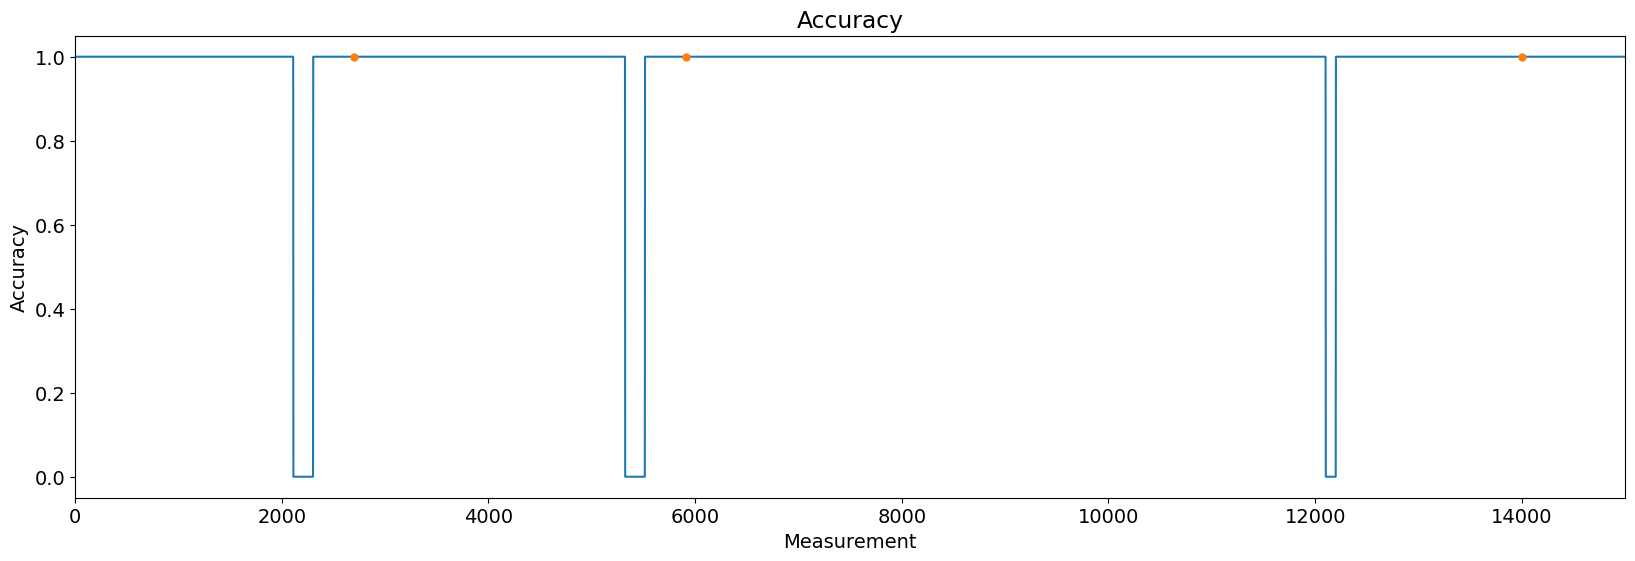

In [9]:
 # set figure size
plt.figure(figsize=(20,6))
# plot accuracy
plt.plot(df['accuracy'], label='accuracy')
plt.plot(df[df['drift_detected']>0]['drift_detected'], linewidth=0, marker='o', markersize=5, label='drift_detected')
# set title and labels
plt.title('Accuracy')
plt.xlabel('Measurement')
plt.ylabel('Accuracy')


# set x limit
plt.xlim(0, 15000)
# show plot
plt.show()

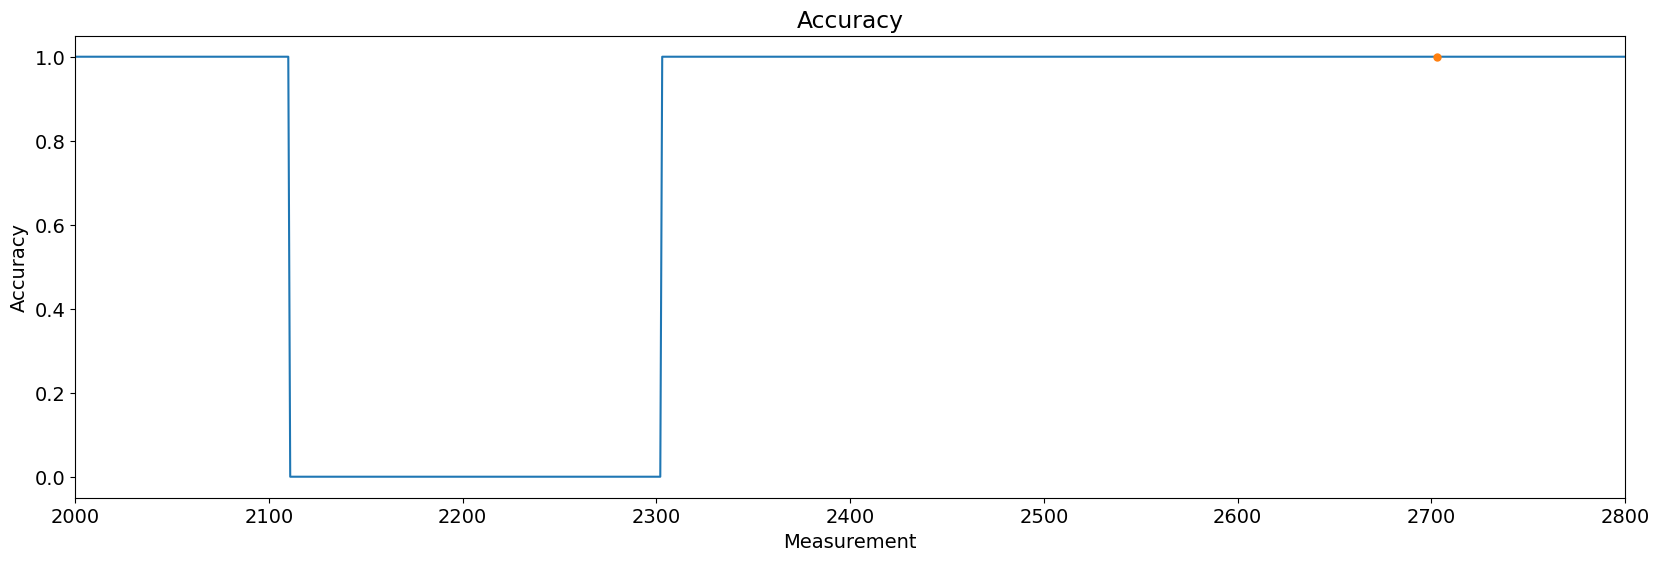

In [11]:
# set figure size
plt.figure(figsize=(20,6))
# plot accuracy
plt.plot(df['accuracy'])
plt.plot(df[df['drift_detected']>0]['drift_detected'], linewidth=0, marker='o', markersize=5)
# set title and labels
plt.title('Accuracy')
plt.xlabel('Measurement')
plt.ylabel('Accuracy')

# set x limit
plt.xlim(2000, 2800)
# show plot
plt.show()